In [29]:
##############################
##          IMPORTS         ##
##############################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split

In [30]:
# Load the iris dataset from sklearn
iris = load_iris()

# Convert the iris dataset to a pandas dataframe
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target variable to the dataframe
iris_data['target'] = iris.target

In [31]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


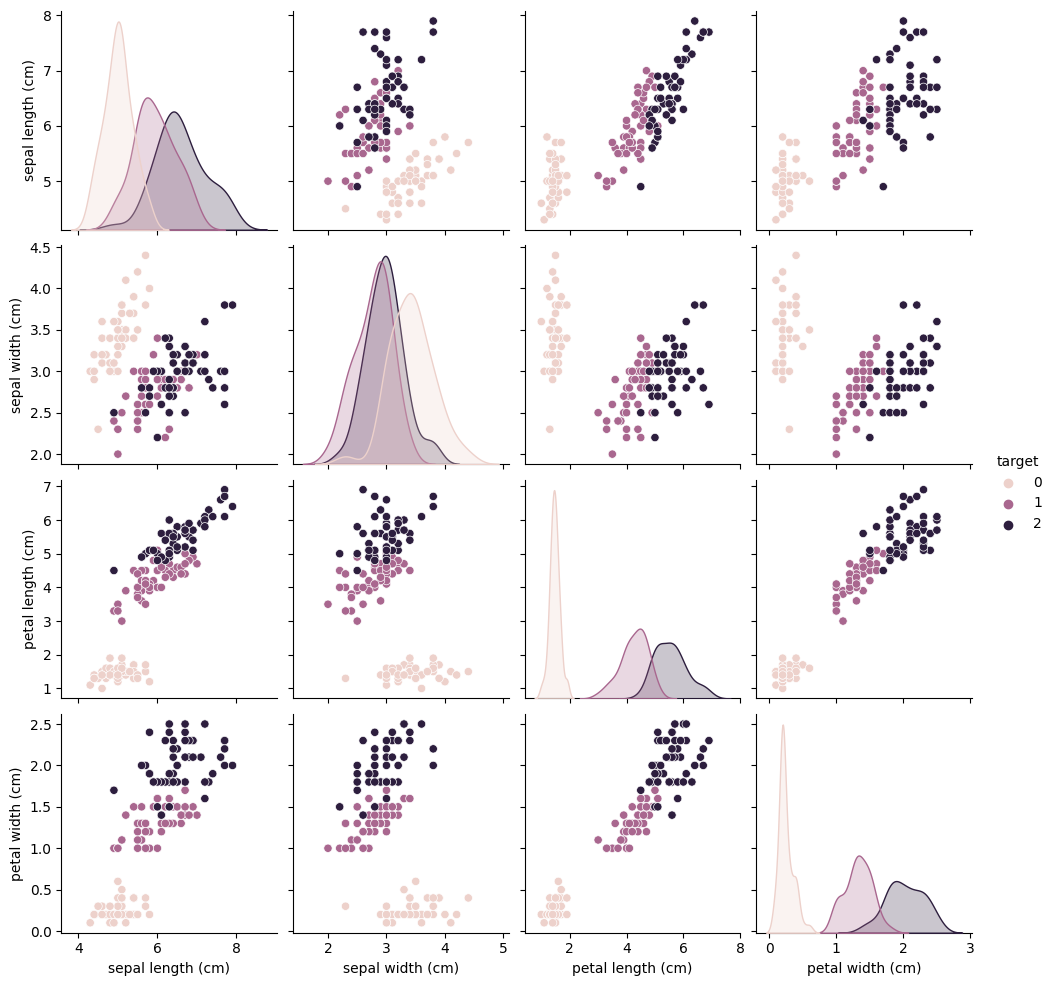

In [32]:
sns.pairplot(iris_data, hue='target')

In [33]:
features = iris_data.drop(columns=['target'])
labels = iris_data['target']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [34]:
ridge_classifier = RidgeClassifier()
ridge_classifier.fit(X_train, y_train)
y_pred = ridge_classifier.predict(X_test)

In [35]:
print(ridge_classifier.score(X_test, y_test))

0.8666666666666667


In [36]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  8,  3],
       [ 0,  1,  8]])

In [37]:
confusion = confusion_matrix(y_test, y_pred)

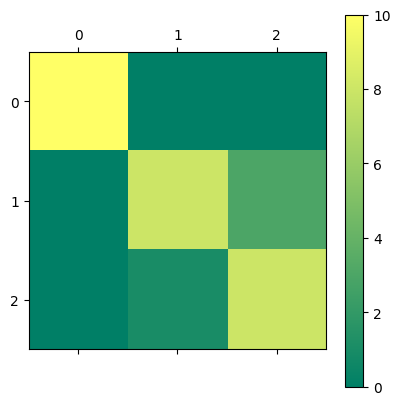

In [38]:
plt.matshow(confusion, cmap='summer')
plt.colorbar()

0.7333333333333333


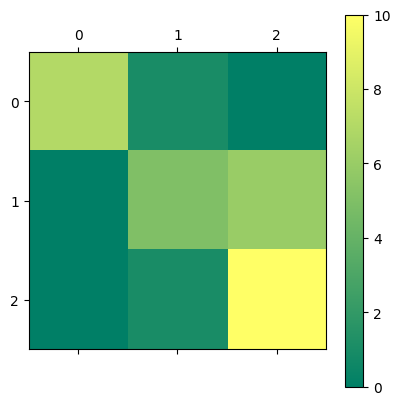

In [39]:
scaler = StandardScaler()
scaler.fit(features)
features_Z = scaler.transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_Z, labels, test_size=0.2)

ridge_classifier = RidgeClassifier()
ridge_classifier.fit(X_train, y_train)
y_pred = ridge_classifier.predict(X_test)

print(ridge_classifier.score(X_test, y_test))

confusion = confusion_matrix(y_test, y_pred)

plt.matshow(confusion, cmap='summer')
plt.colorbar()

In [43]:
best_score = 0
best_alpha = None
for alpha in np.logspace(-4, 4, 5000):
    ridge_classifier = RidgeClassifier(alpha = alpha)
    ridge_classifier.fit(X_train, y_train)
    y_pred = ridge_classifier.predict(X_test)

    score = ridge_classifier.score(X_test, y_test)
    
    if score > best_score:
        best_score = score
        best_alpha = alpha
print("BEST ALPHA:", best_alpha)
print("BEST SCORE:", best_score)

BEST ALPHA: 6.609430387215333
BEST SCORE: 0.7666666666666667


In [10]:
penguin_data = pd.read_csv('https://raw.githubusercontent.com/butler-julie/DSC340LectureNotes/main/penguins.csv')

In [11]:
penguin_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [12]:
penguin_data = penguin_data.dropna()

In [13]:
penguin_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


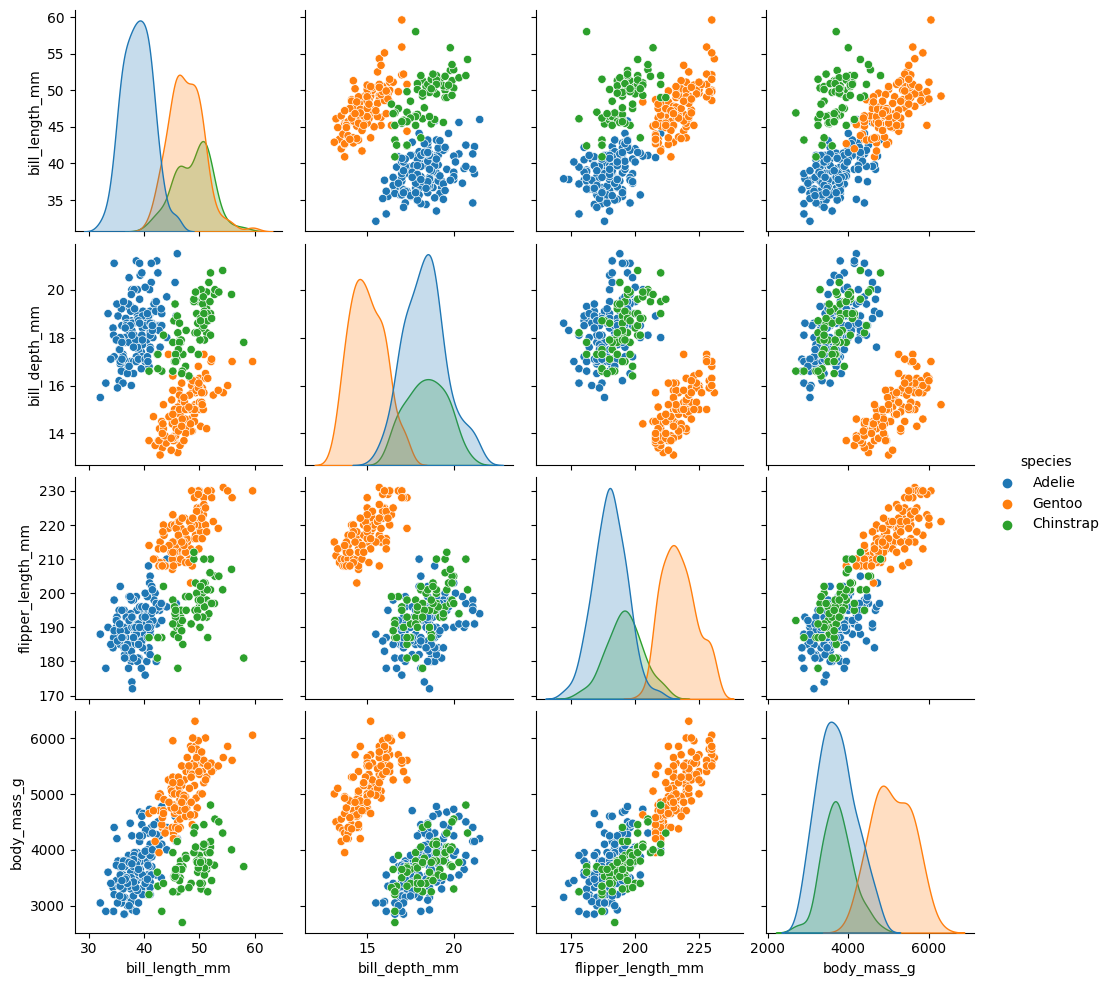

In [16]:
sns.pairplot(penguin_data, hue='species')

/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


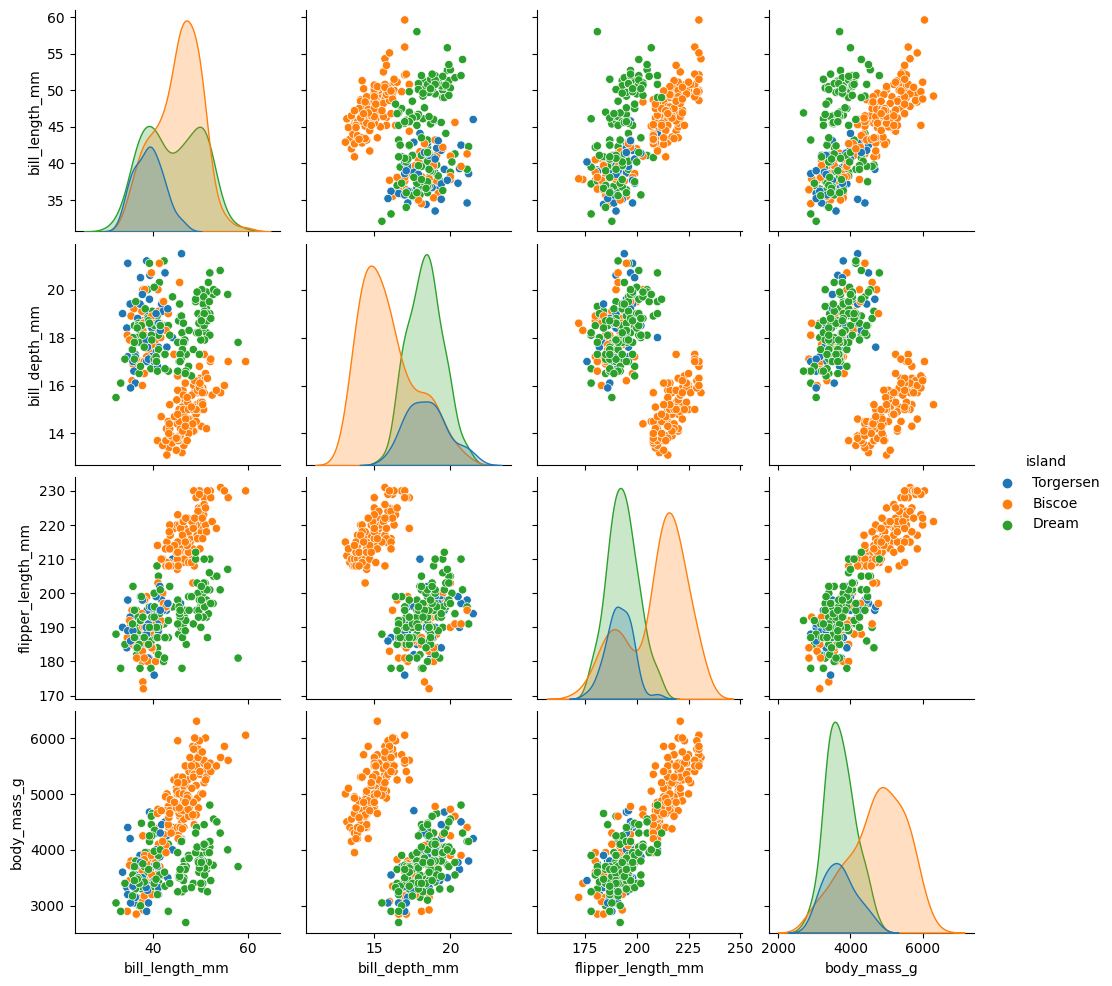

In [18]:
sns.pairplot(penguin_data, hue='island')

/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


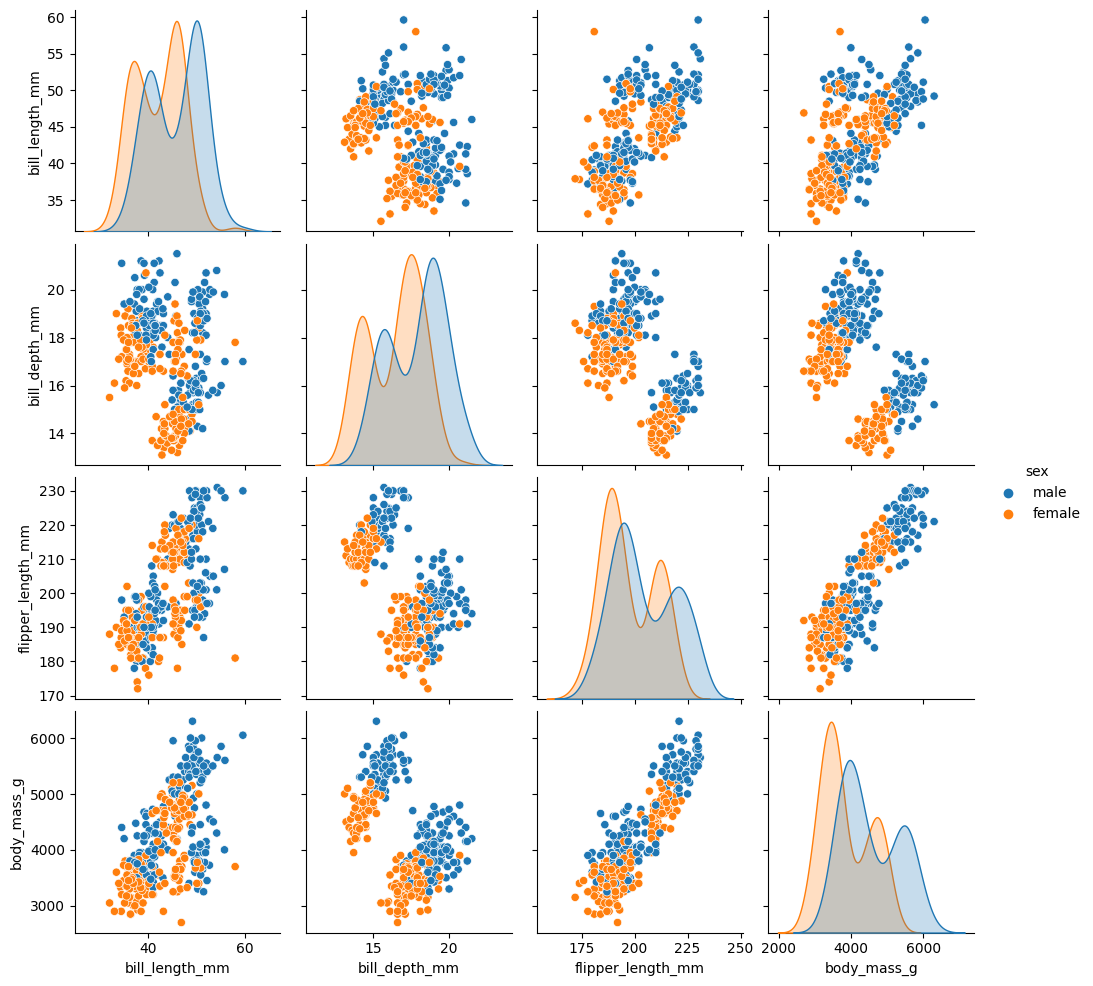

In [22]:
sns.pairplot(penguin_data, hue='sex')

In [23]:
features = penguin_data.drop(columns=['species', 'island', 'sex'])
targets = penguin_data['species']
print(targets)
le = LabelEncoder()
le.fit(targets)
targets = le.transform(targets)
print(targets)

0         Adelie
1         Adelie
2         Adelie
4         Adelie
5         Adelie
         ...    
339    Chinstrap
340    Chinstrap
341    Chinstrap
342    Chinstrap
343    Chinstrap
Name: species, Length: 333, dtype: object
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2)

In [25]:
ridge_classifier = RidgeClassifier()
ridge_classifier.fit(X_train, y_train)
y_pred = ridge_classifier.predict(X_test)

In [26]:
print(ridge_classifier.score(X_test, y_test))

0.9850746268656716


In [27]:
confusion_matrix(y_test, y_pred)

array([[25,  0,  0],
       [ 1, 14,  0],
       [ 0,  0, 27]])